In [1]:
#Import modules
import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit



from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
parentdir = os.getcwd()

The midpoint potential according timetrace is 0.000945543197594
The midpoint potential according FCS is 0.00862848447751


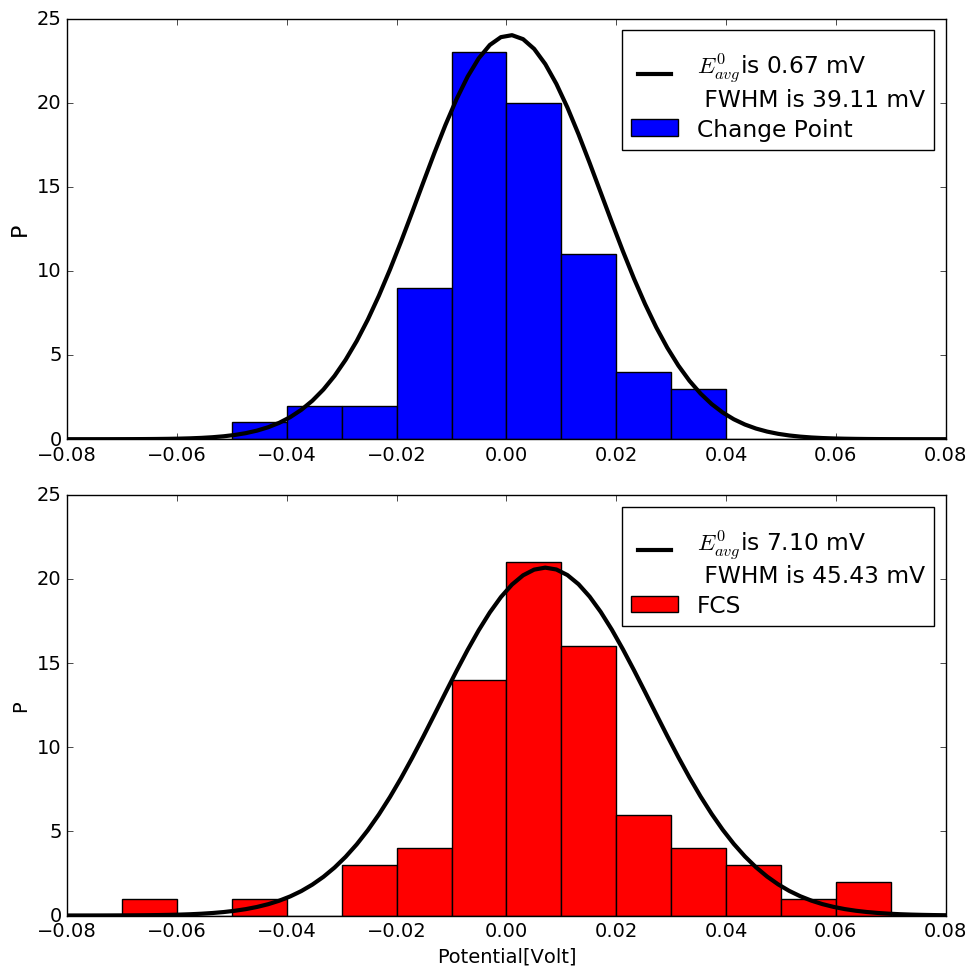

In [8]:
#day1 = S101d14Feb17_60.5_635_A2_CuAzu655 10 points
midpoints_TT_d1 = [-0.008218641605555424, -0.013755856411707955, 0.00629112565924259, 0.0089856104610281581, 0.0023425235741955869, 0.01352050808272098, -0.0060915073509918193, -0.0027576670270779398, -0.0081891995790540177, 0.023072358814789647, 0.014409779752398218]
midpoints_FCS_d1 = [-0.006915336416565534, 0.018076185684811268, 0.011974020130861988, 0.034938481192840959, 0.0019341722661534134, -0.0035870390142309439, 0.012096648626480452, 0.002665045776094849, 0.020477082791919548, 0.010840549592783969, -0.0003425933280302156]
#day 2 = S101d15Feb17_60.5_635_A2_CuAzu655 13/14 points
midpoints_TT_d2 = [0.013213264926873941, -0.035260256759528694, -0.0011388840206184797, 3.6635780122986153e-05, -0.012572012244634534, -0.022334121996039121, -0.026634968942718312, -0.0042406095207708589, 0.011351163597003205, 0.0095442438529323506, 0.01961024742408831, -0.0073922865824945644, -0.0078992701920990172]
midpoints_FCS_d2 = [0.03936243215480472, 0.001673621482544323, 0.0048294043380070935, -0.010488741910898105, 0.0021158767722515778, 0.010304464870698488, 0.0091573077087526503, -0.00030653878530560963, -0.020428311933264155, 0.016666807453090272, 0.013782298515118304, 0.031590351190578098, 0.016410947581404191, 0.026364048533322464]
#day 3 = S101d15Feb17_62.2_635_A2_CuAzu655_2nd 17 points
midpoints_TT_d3 = [-0.018689346756400806, 0.0080687944995871778, 0.019814593877261213, 0.0054898495906857796, 0.006726479194290271, -0.017777705616584649, 0.0074059661142900435, -0.0022197121255062009, 0.0044043422718319514, -0.012631944389010889, -0.010597703568964535, 0.01006065207553292, 0.0047572369423192215, -0.044519616815810556, -0.0027073691914788803, -0.015033481961764022, -0.0029297198382297902]
midpoints_FCS_d3 = [-0.0080301860429216974, 0.014184163842314917, -0.0024776630393527599, 0.022268142683537728, 0.0013933389524321015, 0.0056962358076222104, 0.0021722351849958335, 0.017445597598810245, -0.0014807889602762375, -0.0027297860595193635, 0.0056975624252931789, 0.0069698915217529358, -0.023947814420815131, 0.0061378194607223328, 0.0026762913059217497, 0.015936658831193544, -0.011154507274240083]
#day 4 = S101d16Feb17_60.5_635_A3_CuAzu655 10
midpoints_TT_d4 = [-0.008817083723728282, 0.0090774804570847422, 0.0020053953940359767, 0.0022964622886326048, -0.0079272654242700559, -0.0085037445172413302, -0.019886139500772278, -0.032069119185715353, -0.0054061950087602867, 0.0049825082878321766]
midpoints_FCS_d4 = [-0.025342769404293468, -0.016651692606873419, 0.013645550691195114, -0.0059048124958416322, 0.0023689976094796918, 0.0097260048286858421, 0.013532716739141745, 0.012501772808618949, -0.047278727305865985, -0.0056793368316887857]
#day 5 S104d20Feb17_60.5_635_A1_CuAzu655 17 points
midpoints_TT_d5 = [-0.014968161315632521, 8.0455652834738567e-05, -0.00075207036064087846, -0.0036627456410611306, -0.0035609674836572193, 0.018858404729072624, 0.0081566499252475177, -0.0048667662431014494, -0.0091295088487734696, -0.0012360223409826837, 0.031683395182030193, 0.0070220426120986366, 0.025268957602022513, 0.014561547451774725, 0.029995505970730311, -0.00085626390793639925, 0.029301833477752833]
midpoints_FCS_d5 = [-0.060415111995395621, 0.00084319898250179647, 0.014501079268708047, -0.0045220138160178809, 0.0033039225515870893, 0.033041763448945251, -0.0055728607325229518, -0.010927184023602279, 0.028219887833271617, -0.0011544370962242746, 0.0027784509289701491, 0.0089183422287870719, 0.068897806413381127, 0.023047341835509688, 0.0099172755926428737, -0.0060468876660145325, 0.026768968969316215]
#day 6 S104d21Feb17_60.5_635_A1_CuAzu655 5 points
midpoints_TT_d6 = [0.0083442690215523897, 0.016827398902381906, 0.030497741036954022, -0.0019723351254261022, 0.037628105776497396]
midpoints_FCS_d6 = [0.04951472051970409, 0.041954888664721593, 0.057560864709684412, 0.060846925012042884, 0.04766288740064778]
#day 7 S104d21Feb17_60.5_635_A2_CuAzu655 2 points
midpoints_TT_d7 = [0.011262549705067414, 0.0011659309794991356]
midpoints_FCS_d7 = [0.01646623179481525, 0.005292678340780451]

combined_TT = midpoints_TT_d1 + midpoints_TT_d2 + midpoints_TT_d3 + midpoints_TT_d4 + midpoints_TT_d5 + midpoints_TT_d6 + midpoints_TT_d7
combined_FCS = midpoints_FCS_d1 + midpoints_FCS_d2 + midpoints_FCS_d3 + midpoints_FCS_d4 + midpoints_FCS_d5 + midpoints_FCS_d6 + midpoints_FCS_d7

av_TT = sum(combined_TT)/len(combined_TT)
av_FCS = sum(combined_FCS)/len(combined_FCS)
print('The midpoint potential according timetrace is %s' %av_TT)
print('The midpoint potential according FCS is %s' %av_FCS)
#-------FIgure Parameters---------------
fig, axes = subplots(figsize=(10, 10), ncols=1, nrows=2)
# plt.figure()
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

range=[-0.1, 0.1]
bins=20
bin_centers_on = linspace(range[0], range[1], bins)
x=linspace(range[0], range[1], 100)# for a smooth fitting plot include more points

def gaus(x,M,sigma):
    return exp(-((x-M)**2)/(2*sigma**2))/(sigma*sqrt(2*pi))

#Change point--------------------------
n,bins_on1,patches = axes[0].hist(combined_TT, bins = bins, range=range, color='b', label='Change Point')
popt, pcov = curve_fit(gaus, bin_centers_on, n)
E_mean = popt[0]*1000; #in mV
FWHM = 2.3548*popt[1]*1000; #in mV
axes[0].plot(x,gaus(x,*popt), color = 'k', linewidth = 3, label='$E^0_{avg}$\
is %.2f mV\n FWHM is %.2f mV' %(E_mean, FWHM))
axes[0].set_xlim(-0.08, 0.08)
axes[0].set_ylabel('P', fontsize=16)
axes[0].legend()

#FCS plot------------------------------
n,bins_on1,patches = axes[1].hist(combined_FCS, bins = bins, range=range, color='r', label='FCS')
popt, pcov = curve_fit(gaus, bin_centers_on, n)
E_mean = popt[0]*1000; #in mV
FWHM = 2.3548*popt[1]*1000; #in mV
axes[1].plot(x, gaus(x,*popt), color = 'k', linewidth = 3, label='$E^0_{avg}$\
is %.2f mV\n FWHM is %.2f mV' %(E_mean, FWHM))

axes[1].set_xlim(-0.08, 0.08)
axes[1].set_xlabel('Potential[Volt]')
axes[1].set_ylabel('P')
axes[1].legend()

fig.tight_layout()
plt.show()

In [ ]:
!python new_AC_formula.py
%run new_AC_formula.py

In [ ]:
#************* t_on t_off^(-1) vs potential********************

pointnumbers = 35 #Change this to the minimal amount of points
pot = 12 #number of potentials
current_dir = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S104d21Feb17_60.5_635_A1_CuAzu655' #foldername you want to work in.
protein_amount = 24 #number of proteins you want to be plotted (will plot the first x proteins)
#interested_protein_numbers = [0, 3, 8, 10, 11] #prot nr - 1
interested_protein_numbers = [0, 3, 8, 10, 11]
savename_file = 't_ratio_14Feb17_newformula.xls'
save_fig_name = 't_ratio_plot'
minimal_pot = 40 #potential till timetrace t_on and t_off is sufficient. Potentials below this value = FCS
tminFCS = 0.01
tmaxFCS = 10000
minimal_points = 4 #minimal points of a given point to calculate the midpoint potential. Example:
#some protein were only active in 2 potentials. to filter these out, set a minimal amount of active potentials here.
t_ratio_notebook(pot, pointnumbers, current_dir, protein_amount, interested_protein_numbers, savename_file, save_fig_name, minimal_pot, tminFCS, tmaxFCS, minimal_points)